# ML_AT3 Experiment - Classification Analysis

_Thirada Tiamklang 14337188_

In this experiment, we will identify __fraudulent behaviour__ by predicting if a transaction is fraudulent or not. Using machine learning with classification models to train the best models that provided the most accurate results. 

The models include Logistic regression, K-Nearest Neighbor Classifier(KNN), and Gaussian Naive Bayes using cross-validation and grid search to prevent the under and overfitting.  

1. Import and merge dataset
2. Explore and visaulisation
3. Clean data and feature engineering
4. Split data
5. Scale data
6. K-fold split
7. Logistic regression
8. K-Nearest Neighbor Classifier(KNN)
9. Gaussian Naive Bayes
10. Conclusion

## 1. Import and merge dataset

### 1.1 Customers dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
cus = pd.read_csv('customers.csv', sep='|', header=0)

In [4]:
cus.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [5]:
cus.shape

(1000, 15)

There are 1,000 customers in this bank's dataset.

### 1.2 Transactions dataset

We will use the loop to separate and merge all the dataset into only one file.

In [6]:
import pandas as pd

# List of file names to read in
file_names = ['transactions_{}.csv'.format(i) for i in range(132)]

# List of DataFrames to concatenate
dfs = []

# Loop through the file names and read in the CSV files
for file_name in file_names:
    # Read in the CSV file with pipe (|) as separator
    df = pd.read_csv(file_name, sep='|', header=0)
    
    # Add the DataFrame to the list of DataFrames
    dfs.append(df)

# Concatenate the DataFrames
result = pd.concat(dfs)

# Print the resulting DataFrame
print(result.head())


          cc_num      acct_num                         trans_num   unix_time  \
0  4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d  1558719550   
1  4218196001337  888022315787  071553d533a6822a4431c354c434ddcb  1569425519   
2  4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151  1577205601   
3  4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f  1571428238   
4  4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e  1549840400   

        category    amt is_fraud        merchant  merch_lat  merch_long  
0  gas_transport  69.12        0  Phillips Group  39.491416  -75.588522  
1    grocery_pos  68.11        0      Tucker Ltd  40.890319  -75.573359  
2       misc_net  40.35        0       Dixon PLC  39.244958  -74.475327  
3    grocery_pos  96.22        0  Lambert-Cooper  39.656925  -75.802342  
4  gas_transport  71.89        0    Griffith LLC  40.313342  -74.220434  


In [7]:
result.shape

(4260904, 10)

The total number of transactions is 4,260,904.

### 1.3 Merge customers and Transactions dataset

Now, we will merge the customers and transactions dataset together. With the same columns: cc_num and acct_num.

In [8]:
result.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

In [9]:
cus.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num'],
      dtype='object')

In [10]:
df = pd.merge(cus, result, on=['acct_num', 'cc_num'])
print(df.head())

           ssn         cc_num     first     last gender                street  \
0  115-04-4507  4218196001337  Jonathan  Johnson      M  863 Lawrence Valleys   
1  115-04-4507  4218196001337  Jonathan  Johnson      M  863 Lawrence Valleys   
2  115-04-4507  4218196001337  Jonathan  Johnson      M  863 Lawrence Valleys   
3  115-04-4507  4218196001337  Jonathan  Johnson      M  863 Lawrence Valleys   
4  115-04-4507  4218196001337  Jonathan  Johnson      M  863 Lawrence Valleys   

     city state    zip      lat  ...         dob      acct_num  \
0  Ambler    PA  19002  40.1809  ...  1959-10-03  888022315787   
1  Ambler    PA  19002  40.1809  ...  1959-10-03  888022315787   
2  Ambler    PA  19002  40.1809  ...  1959-10-03  888022315787   
3  Ambler    PA  19002  40.1809  ...  1959-10-03  888022315787   
4  Ambler    PA  19002  40.1809  ...  1959-10-03  888022315787   

                          trans_num   unix_time       category    amt  \
0  91ab12e73ef38206e1121e9648d2408d  155871

In [11]:
df.shape

(4260904, 23)

After we merged all the datasets, the number of transactions with the details of each customer was 4,260,904 with 23 features.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  trans_num   object 
 16  unix_time   object 
 17  category    object 
 18  amt         float64
 19  is_fraud    object 
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(2), object(16)
memory usage: 780.2+ MB


In [13]:
# df.to_csv('/Users/thiradatiamklang/Desktop/ML/At3/merged_transactions.csv', index=False)

We will convert bod and unix_time into the forms of age and timestamp to be used in the training process.

In [14]:
import datetime

#convert bod into age
current_year = datetime.datetime.now().year
df['dob'] = pd.to_datetime(df['dob']) 
df['age'] = current_year - df['dob'].dt.year

#convert unix_time into timestamp
df['timestamp'] = df['unix_time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [15]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,age,timestamp
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,64,2019-05-25 03:39:10
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,64,2019-09-26 01:31:59
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,64,2019-12-25 03:40:01
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,64,2019-10-19 06:50:38
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,64,2019-02-11 10:13:20


In [16]:
#drop the dob and unix_time
df.drop(['dob', 'unix_time'], axis=1, inplace=True)

In [17]:
df.shape

(4260904, 23)

In [18]:
# df.to_csv('/Users/thiradatiamklang/Desktop/ML/At3/cleaned_transactions.csv', index=False)

## 2. Explore and visaulisation

In [19]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,age,timestamp
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,888022315787,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,64,2019-05-25 03:39:10
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,888022315787,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,64,2019-09-26 01:31:59
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,888022315787,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,64,2019-12-25 03:40:01
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,888022315787,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,64,2019-10-19 06:50:38
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,888022315787,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,64,2019-02-11 10:13:20


In [20]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'acct_num', 'trans_num',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'age', 'timestamp'],
      dtype='object')

### 2.1 Visualisation

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

__The bar chart of the target feature, is_fraud, represents whether the customers are frauds or not.__

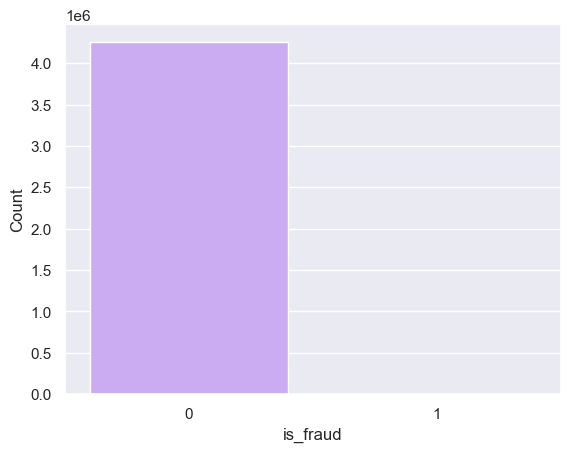

In [22]:
sns.set(style="darkgrid")
ax = sns.countplot(x="is_fraud", data=df, palette=sns.xkcd_palette(["pastel purple", "light green"]))
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

In [23]:
df['is_fraud'].sum()

5034

It can be seen obviously that the the target variable, is_fraud, is imbalanced. In this case, we have a significantly higher number of transactions that are not fraud compared to those that are fraud. This can lead to a bias in the model towards predicting that a transaction is not fraud. We may use the Over-sampling Technique (SMOTE) to address this issue.

__The heatmap represents the correlation between features before encoding the categorical data__

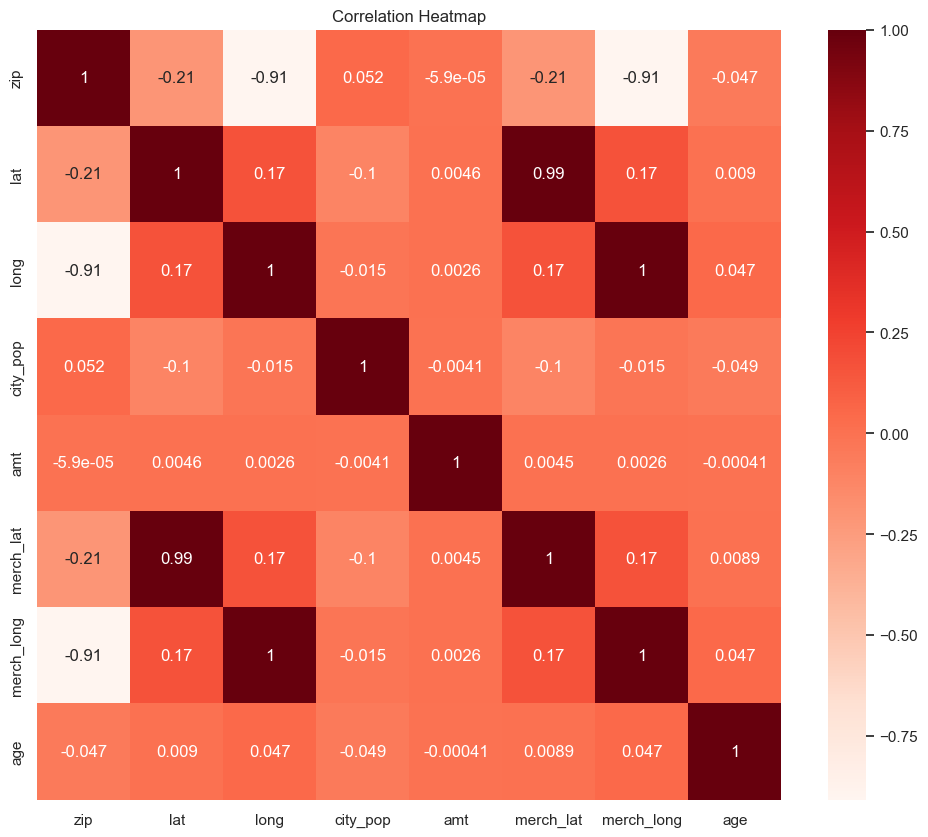

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Heatmap')

# Add the title to the plot
plt.show()


It can be seen that the merchant's latitude and longitude are highly correlated with the latitude and longitude of the transaction. We may remove these features since they may not provide any additional information to the model.

## 3. Clean data and feature engineering

### 3.1 Check NA and duplicate

We will check the missing values first.

In [25]:
print(df.isnull().sum())

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
acct_num      0
trans_num     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
age           0
timestamp     0
dtype: int64


There is no missing values in the dataset.

In [26]:
print(df.duplicated().sum())

0


Also, there is no duplicate rows in the dataset.

### 3.2 Feature engineering

There are two new features that may relate to the target variable, which are __transaction amount per account and transaction frequency per merchant.__ We will use these two features calculated from the acct_num, amt, merchant, and trans_num columns instead of just merchant and amount of transaction.

In [27]:
import pandas as pd

# Calculate transaction amount per account
amount_per_acct = df.groupby('acct_num')['amt'].transform('sum')
df['amt_per_acct'] = amount_per_acct

# Calculate transaction frequency per merchant
freq_per_merch = df.groupby('merchant')['trans_num'].transform('count')
df['freq_per_merch'] = freq_per_merch

# Print the updated DataFrame
df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,category,amt,is_fraud,merchant,merch_lat,merch_long,age,timestamp,amt_per_acct,freq_per_merch
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,64,2019-05-25 03:39:10,206986.20,1302
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,64,2019-09-26 01:31:59,206986.20,350
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,64,2019-12-25 03:40:01,206986.20,375
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,64,2019-10-19 06:50:38,206986.20,194
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,64,2019-02-11 10:13:20,206986.20,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,81,2021-07-30 19:22:23,350440.28,117
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,81,2021-06-28 21:38:46,350440.28,467
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,health_fitness,5.82,0,White LLC,27.110602,-82.426821,81,2021-08-24 19:37:49,350440.28,1687
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,81,2021-08-26 21:16:35,350440.28,136


In [28]:
df['full_name'] = df['first'] + ' ' + df['last']
df = df.drop(['first', 'last'], axis=1)
df

,ssn,cc_num,gender,street,city,state,zip,lat,long,city_pop,...,amt,is_fraud,merchant,merch_lat,merch_long,age,timestamp,amt_per_acct,freq_per_merch,full_name
0,115-04-4507,4218196001337,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,...,69.12,0,Phillips Group,39.491416,-75.588522,64,2019-05-25 03:39:10,206986.20,1302,Jonathan Johnson
1,115-04-4507,4218196001337,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,...,68.11,0,Tucker Ltd,40.890319,-75.573359,64,2019-09-26 01:31:59,206986.20,350,Jonathan Johnson
2,115-04-4507,4218196001337,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,...,40.35,0,Dixon PLC,39.244958,-74.475327,64,2019-12-25 03:40:01,206986.20,375,Jonathan Johnson
3,115-04-4507,4218196001337,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,...,96.22,0,Lambert-Cooper,39.656925,-75.802342,64,2019-10-19 06:50:38,206986.20,194,Jonathan Johnson
4,115-04-4507,4218196001337,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,...,71.89,0,Griffith LLC,40.313342,-74.220434,64,2019-02-11 10:13:20,206986.20,459,Jonathan Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,...,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,81,2021-07-30 19:22:23,350440.28,117,Isaac Smith
4260900,107-40-0160,343251790447085,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,...,2.30,0,Hanson and Sons,27.896372,-83.387356,81,2021-06-28 21:38:46,350440.28,467,Isaac Smith
4260901,107-40-0160,343251790447085,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,...,5.82,0,White LLC,27.110602,-82.426821,81,2021-08-24 19:37:49,350440.28,1687,Isaac Smith
4260902,107-40-0160,343251790447085,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,...,9.16,0,Snyder-Johnson,28.110510,-81.891797,81,2021-08-26 21:16:35,350440.28,136,Isaac Smith


### 3.3 Select features

The target variable represents whether the customers have fraudulent behaviour or not. We will decide to choose the features that are relevant to the target in this step.

- 'ssn', 'cc_num', 'first', 'last', 'gender', 'dob', 'street', 'city', 'state', 'zip': These features could be used for identity verification and to check if the customer is legitimate or not.
- 'amt': Fraudsters might make high-value transactions or transactions that are significantly higher than their usual spending patterns.
- 'category', 'merchant': Certain merchants or transaction categories may be more prone to fraudulent behavior.
- 'amt_per_acct', 'freq_per_merch': These features could also be indicative of fraudulent behavior, as fraudsters may frequently make transactions with the same merchant or use the same account for multiple transactions.

However, the 'amt' and 'merchant' have been calculated into 'amt_per_acct', 'freq_per_merch' that we may use these two features instead of them. The ssn, cc_num, first, and last represent the same as the customers' names. So we will select the 'acct_num' instead for these identity details as ssn and cc_num and also full_name are concerned for privacy. Similar to street, city, state, and zip, we will choose only zip. For dob, we have converted it into age, which is in the "age" column.

In conclusion, we will select the features as X to train the model including:
- acct_num
- zip
- age
- category
- amt_per_act
- freq_per_merch

### 3.4 Convert categorical data

After we select the features, we have to convert the categorical data into numeric first.

In [29]:
print(df[['acct_num', 'zip', 'age', 'category', 'amt_per_acct', 'freq_per_merch']].dtypes)

acct_num           object
zip                 int64
age                 int64
category           object
amt_per_acct      float64
freq_per_merch      int64
dtype: object


In [30]:
df['category'].nunique()

14

In [31]:
df['acct_num'].nunique()

983

In [32]:
df['zip'].nunique()

939

full_name, zip, category, and is_fraud are categorical features. We will use __Label encoding__ due to the large number of unique categories.

In [33]:
newdf = df[['acct_num', 'zip', 'category', 'age', 'amt_per_acct', 'freq_per_merch', 'is_fraud']]

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

newdf['acct_num_encoded'] = le.fit_transform(newdf['acct_num'])
newdf['zip_encoded'] = le.fit_transform(newdf['zip'])
newdf['category_encoded'] = le.fit_transform(newdf['category'])
newdf['is_fraud_encoded'] = le.fit_transform(newdf['is_fraud'])

In [35]:
newdf.head()

,acct_num,zip,category,age,amt_per_acct,freq_per_merch,is_fraud,acct_num_encoded,zip_encoded,category_encoded,is_fraud_encoded
0,888022315787,19002,gas_transport,64,206986.2,1302,0,868,159,2,0
1,888022315787,19002,grocery_pos,64,206986.2,350,0,868,159,4,0
2,888022315787,19002,misc_net,64,206986.2,375,0,868,159,8,0
3,888022315787,19002,grocery_pos,64,206986.2,194,0,868,159,4,0
4,888022315787,19002,gas_transport,64,206986.2,459,0,868,159,2,0


### 3.5 Synthetic Minority Over-sampling Technique (SMOTE):

Now we will handle the issue of imbalanced data in is_fraud using oversampling.

In [36]:
from imblearn.over_sampling import SMOTE

# Separate the target variable and features
cols_to_drop = ['acct_num', 'zip', 'category', 'is_fraud', 'is_fraud_encoded']
X = newdf.drop(cols_to_drop, axis=1)
y = newdf['is_fraud_encoded']

# Apply SMOTE oversampling to balance the target variable
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Check the new balance of the target variable
print(y.value_counts())

0    4255870
1    4255870
Name: is_fraud_encoded, dtype: int64


Now that the distribution of fraud and non-fraud is balanced.

## 4. Split data

Split data into data and testing set with 80-20% ratio

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6809392, 6)
(1702348, 6)
(6809392,)
(1702348,)


## 5. Scale data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 6. K-fold split

We will use cross-validation to split the dataset. The test size from spliting data above is 0.2 and we will do the cross validation as 5 with random state = 42.

In [40]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=42)

Next step is to train the models with different algorithms using K-fold validation and GridSearch to find the best parameters.

In [41]:
#using sckit-learn library for the models and algorithms
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix, f1_score

## 7 . Logistic Regression

We will train the model using logistic regression with grid search to find the best parameters.

In [42]:
# Defining all the parameters
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}

In [43]:
# Building model
logreg = LogisticRegression()

In [44]:
# Parameter estimating using GridSearch
reggrid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

In [45]:
# Fit the model
reggrid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [46]:
#The best estimtors
logreg_grid_val_score = reggrid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', reggrid.best_params_)
print('Best Estimator:', reggrid.best_estimator_)

Best Score: 0.6106079908714358
Best Params: {'C': 0.2, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.2)


The best hyperparameters are C=0.2 with L2 regularisation. The best accuracy score is 0.6106079908714358.

In [47]:
#predicting on test feature dataset(X_test)

In [48]:
logreg_grid = reggrid.best_estimator_
y_pred = logreg_grid.predict(X_test)

In [49]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

,Predicted 0,Predicted 1
Actual 0,474250,377296
Actual 1,284530,566272


In [50]:
logreg_grid_score = accuracy_score(y_test, y_pred)
logreg_grid_f1 = f1_score(y_test, y_pred)
print('logreg Accuracy:', logreg_grid_score)
print('logreg f1 score:', logreg_grid_f1)
print('Classification Report:\n', classification_report(y_test, y_pred))

logreg Accuracy: 0.6112275515934462
logreg f1 score: 0.6311652557722209
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59    851546
           1       0.60      0.67      0.63    850802

    accuracy                           0.61   1702348
   macro avg       0.61      0.61      0.61   1702348
weighted avg       0.61      0.61      0.61   1702348



The accuracy score on test set is __0.6112275515934462.__
The f1 score on test set is __0.6311652557722209.__

## 8. K-Nearest Neighbor Classifier(KNN)

We will train the model using K-Nearest Neighbor Classifier with grid search to find the best parameters.

In [51]:
# Defining all the parameters
params = {
    'n_neighbors': [3,5,7,11],
    'weights': ['uniform','distance']
}

In [52]:
# Building model
knn = KNeighborsClassifier()

In [53]:
# Parameter estimating using GridSearch
knngrid = GridSearchCV(knn, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

In [54]:
# Fit the model
knngrid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [55]:
#The best estimtors
knn_grid_val_score = knngrid.best_score_
print('Best Score:', knn_grid_val_score)
print('Best Params:', knngrid.best_params_)
print('Best Estimator:', knngrid.best_estimator_)

Best Score: 0.9347658639277057
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(n_neighbors=7)


The best hyperparameters are n_neighbors=7 using weight uniform. The best accuracy score is 0.9347658639277057.

In [56]:
#predicting on test feature dataset(X_test)
knn_grid= knngrid.best_estimator_
y_pred = knn_grid.predict(X_test)

In [57]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

,Predicted 0,Predicted 1
Actual 0,771439,80107
Actual 1,29030,821772


In [58]:
knn_grid_score = accuracy_score(y_test, y_pred)
knn_grid_f1 = f1_score(y_test, y_pred)
print('knn Accuracy:', knn_grid_score)
print('knn f1 score:', knn_grid_f1)
print('Classification Report:\n', classification_report(y_test, y_pred))

knn Accuracy: 0.9358903114991765
knn f1 score: 0.9377313955020908
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93    851546
           1       0.91      0.97      0.94    850802

    accuracy                           0.94   1702348
   macro avg       0.94      0.94      0.94   1702348
weighted avg       0.94      0.94      0.94   1702348



The accuracy score on test set is __0.9358903114991765.__ The f1 score on test set is __0.9377313955020908.__

## 9. Gaussian Naive Bayes

We will train the model using Gaussian Naive Bayes with grid search to find the best parameters.

In [59]:
# Defining all the parameters
import numpy as np

params = {
    'var_smoothing': np.logspace(-10, -1, num=10)
}

In [60]:
# Building model
gb = GaussianNB()

In [61]:
# Parameter estimating using GridSearch
gbgrid = GridSearchCV(gb, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

In [62]:
# Fit the model
gbgrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])},
             scoring='accuracy', verbose=1)

In [63]:
#The best estimtors
gb_grid_val_score = gbgrid.best_score_
print('Best Score:', gb_grid_val_score)
print('Best Estimator:', gbgrid.best_estimator_)

Best Score: 0.6118201396746701
Best Estimator: GaussianNB(var_smoothing=1e-05)


The best hyperparameters is var_smoothing=1e-05. The best accuracy score is 0.6118201396746701.

In [64]:
#predicting on test feature dataset(X_test)
gb_grid= gbgrid.best_estimator_
y_pred = gb_grid.predict(X_test)

In [65]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

,Predicted 0,Predicted 1
Actual 0,392543,459003
Actual 1,201767,649035


In [66]:
gb_grid_score = accuracy_score(y_test, y_pred)
gb_grid_f1 = f1_score(y_test, y_pred)
print('gb Accuracy:', gb_grid_score)
print('gb f1 score:', gb_grid_f1)
print('Classification Report:\n', classification_report(y_test, y_pred))

gb Accuracy: 0.6118478712930611
gb f1 score: 0.6626728063547814
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.46      0.54    851546
           1       0.59      0.76      0.66    850802

    accuracy                           0.61   1702348
   macro avg       0.62      0.61      0.60   1702348
weighted avg       0.62      0.61      0.60   1702348



The accuracy score on test set is __0.6118478712930611.__ The f1 score on test set is __0.6626728063547814.__

## 10. Conclusion

After we trained and tested all the models, the result represents in the table below.

In [67]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, logreg_grid_val_score],
        ['K-Nearest Neighbors', knn_grid_score, knn_grid_val_score],
        ['Gaussian Naïve Bayes', gb_grid_score, gb_grid_val_score],
    ],
        columns= ['Model', 'Test Score', 'Validation Score']
)
score_df['Test Score'] = score_df['Test Score']*100
score_df['Validation Score'] = score_df['Validation Score']*100

In [68]:
score_df

,Model,Test Score,Validation Score
0,Logistic Regression,61.122755,61.060799
1,K-Nearest Neighbors,93.589031,93.476586
2,Gaussian Naïve Bayes,61.184787,61.182014


It can be seen that K-Nearest Neighbors provided the best validation and test acucuracy score.

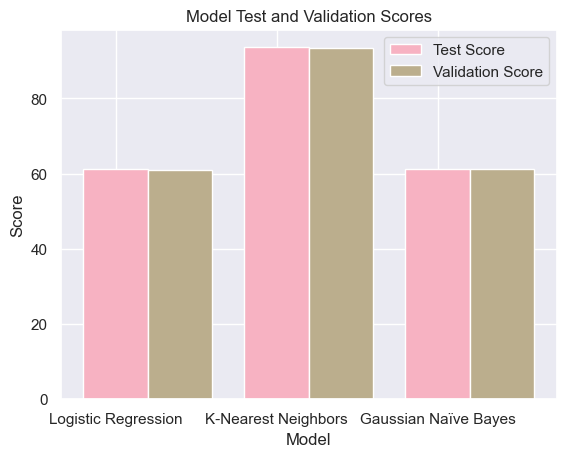

In [69]:
import matplotlib.pyplot as plt

# Define color palette
colors = ['#F7B2C2', '#BBAE8D']

# Create bar plot data
test_score = score_df['Test Score'].tolist()
val_score = score_df['Validation Score'].tolist()
x_labels = score_df['Model'].tolist()

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_title('Model Test and Validation Scores')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.bar(x_labels, test_score, width=0.4, color=colors[0], label='Test Score')
ax.bar([x + 0.4 for x in range(len(x_labels))], val_score, width=0.4, color=colors[1], label='Validation Score')

# Add legend and show plot
ax.legend()
plt.show()


The bar graph above represents the test and validation accuracy scores. It can be observed that the test scores and the best scores of each model are very close to each other. However, it is noticeable that using KNN resulted in the best score

To aid the Compliance Team in detecting fraudulent behavior by predicting whether a transaction is fraudulent or not, the KNN model with n_neighbors=7 provided the highest accuracy score. The team can utilize this model to predict the likelihood of fraudulent activity by customers and minimize the risk of losses resulting from fraud.

## 11. Deployment

We will deploy the KNN model with the best estimator on Streamlit app.

- save the trained knn model by pickle and create the app.py file for the streamlit. the code is on GitHub: https://github.com/thirada2799/ML_AT3/blob/main/app.py

In [ ]:
import pickle
filename = 'knn_model.pkl'
pickle.dump(knngrid, open(filename, 'wb'))

- deploy the streamlit app: Network URL: http://10.255.131.75:8502

## Reference

Singh, A. (2020). _Binary Classification using Machine Learning_. https://www.kaggle.com/code/abhigyan2311/binary-classification-using-machine-learning